In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
import numpy as np
import pandas as pd

def generate_synthetic_data(num_users, distribution_type='uniform', seed=None,starting_user_id = 0):
    if seed is not None:
        np.random.seed(seed)
    
    # Define possible distributions
    def uniform_dist(depth):
        return (depth+1)*np.random.randint(10, 100)

    def normal_dist(depth):
        return (depth+1)*abs(int(np.random.normal(50, 10)))

    def exponential_dist(depth):
        return (depth+1)*int(np.random.exponential(50))
    
    distribution_func = {
        'uniform': uniform_dist,
        'normal': normal_dist,
        'exponential': exponential_dist
    }.get(distribution_type, uniform_dist)
    
    data = []
    for user_id in range(1+starting_user_id, starting_user_id+num_users+1):
        depth = 0
        total_node_ct = distribution_func(depth)
        while depth < 7 and total_node_ct > 0:
            business_event_ct = np.random.poisson(5)*(depth+1)
            node_type1_ct = (total_node_ct - business_event_ct) if total_node_ct > business_event_ct else total_node_ct // 2
            node_type2_ct = (total_node_ct - node_type1_ct)
            query_time = np.random.uniform(0.1, 0.5)*(depth+1)
            
            data.append([user_id, depth, total_node_ct, business_event_ct, node_type1_ct, node_type2_ct, query_time])
            
            depth += 1
            total_node_ct = distribution_func(depth)
    
    df = pd.DataFrame(data, columns=['user_id', 'depth', 'total_node_ct', 'business_event_ct', 'node_type1_ct', 'node_type2_ct', 'query_time'])
    return df


In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_data(df):
    plt.figure(figsize=(14, 7))
    
    # Plot total_node_ct changes with depth for each user
    plt.subplot(1, 2, 1)
    sns.lineplot(data=df, x='depth', y='total_node_ct', hue='user_id', palette='viridis', marker='o',alpha=.4)
    plt.title('Total Node Count vs. Depth')
    plt.xlabel('Depth')
    plt.ylabel('Total Node Count')
    
    # Plot distributions of node types
    plt.subplot(1, 2, 2)
    melted_df = df.melt(id_vars=['user_id', 'depth'], value_vars=['node_type1_ct', 'node_type2_ct'], var_name='node_type', value_name='count')
    sns.lineplot(data=melted_df, x='depth', y='count', hue='node_type', style='node_type', markers=True, dashes=False,alpha=0.7)
    plt.title('Node Type Count Distribution vs. Depth')
    plt.xlabel('Depth')
    plt.ylabel('Node Type Count')
    
    plt.tight_layout()
    plt.show()


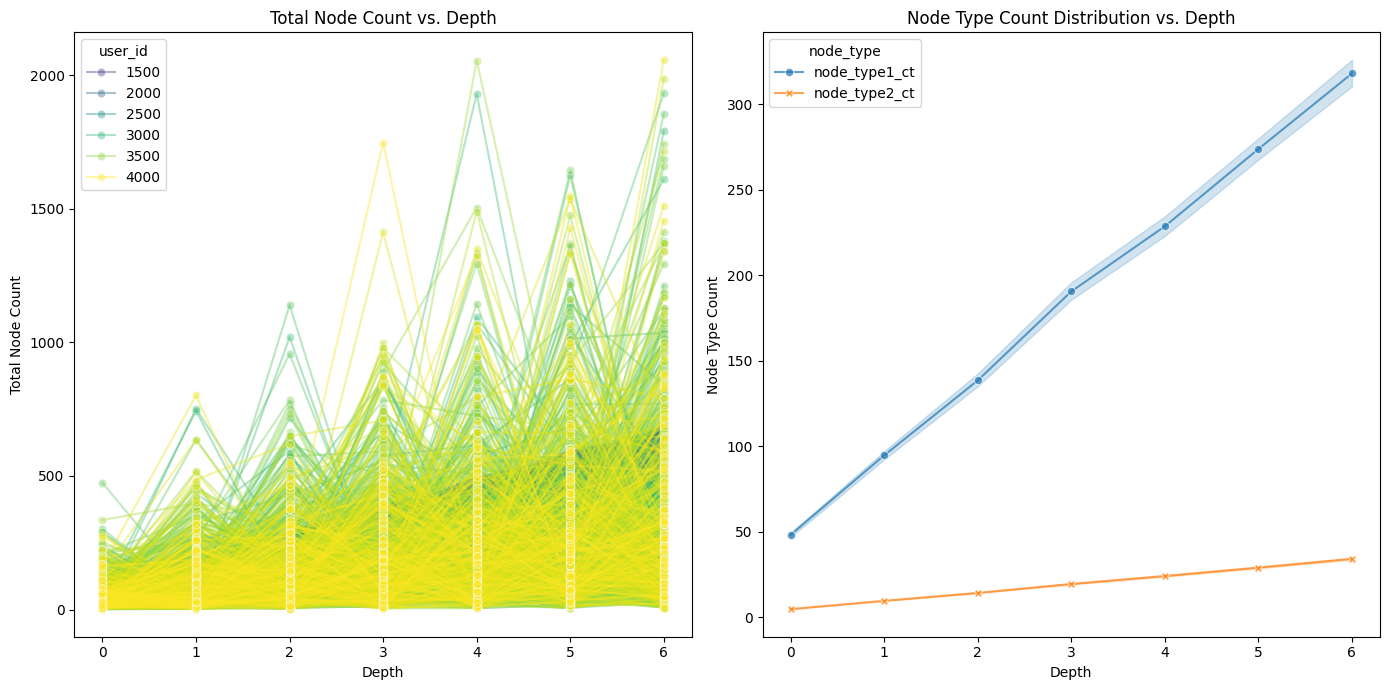

In [37]:
n = 1000
# Example usage
df1 = generate_synthetic_data(n, 'uniform', seed=42,starting_user_id=n)
df2 = generate_synthetic_data(n, 'normal', seed=42,starting_user_id=2*n)
df3 = generate_synthetic_data(n, 'exponential', seed=42,starting_user_id=3*n)
df = pd.concat([df1, df2, df3])
plot_data(df)


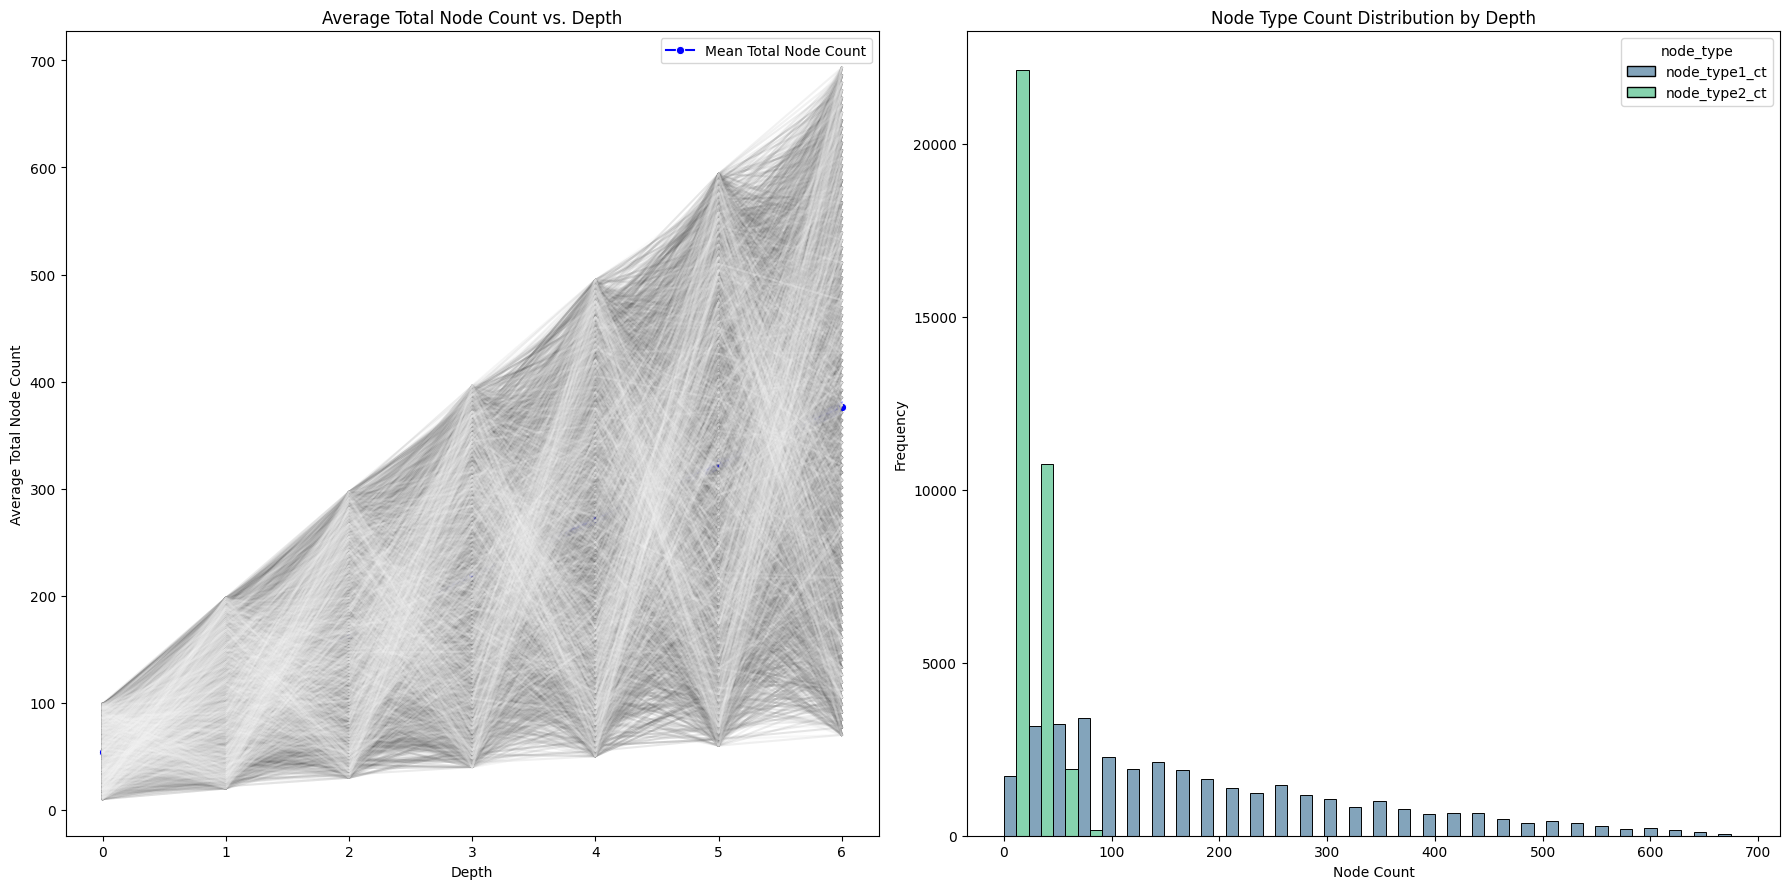

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_data_improved(df):
    plt.figure(figsize=(18, 9))
    
    # Calculate the mean and confidence interval
    mean_df = df.groupby('depth')['total_node_ct'].mean().reset_index()
    ci_df = df.groupby('depth')['total_node_ct'].sem() * 1.96  # 95% confidence interval
    
    # Plot average total_node_ct with confidence intervals
    plt.subplot(1, 2, 1)
    sns.lineplot(x='depth', y='total_node_ct', data=mean_df, marker='o', label='Mean Total Node Count', color='blue')
    plt.fill_between(mean_df['depth'], (mean_df['total_node_ct'] - ci_df), (mean_df['total_node_ct'] + ci_df), color='blue', alpha=0.3)
    plt.title('Average Total Node Count vs. Depth')
    plt.xlabel('Depth')
    plt.ylabel('Average Total Node Count')

    # Plot individual observations with high opacity but low visibility
    sns.lineplot(data=df, x='depth', y='total_node_ct', hue='user_id', palette='gray', legend=None, alpha=0.1)

    # Melt the dataframe for histogram plotting
    plt.subplot(1, 2, 2)
    melted_df = df.melt(id_vars=['depth'], value_vars=['node_type1_ct', 'node_type2_ct'], var_name='node_type', value_name='count')
    
    sns.histplot(data=melted_df, x='count', hue='node_type', element='bars', multiple='dodge', palette='viridis', alpha=0.6, bins=30)
    plt.title('Node Type Count Distribution by Depth')
    plt.xlabel('Node Count')
    plt.ylabel('Frequency')
    
    plt.tight_layout()
    plt.show()

# Example usage
df = generate_synthetic_data(5000, 'uniform', seed=42)
plot_data_improved(df)


In [31]:
df

,user_id,depth,total_node_ct,business_event_ct,node_type1_ct,node_type2_ct,query_time
0,1,0,61,5,56,5,0.446470
1,1,1,66,8,58,8,0.993769
2,1,2,126,15,111,15,0.650574
3,1,3,356,12,344,12,1.973169
4,1,4,60,15,45,15,2.384404
...,...,...,...,...,...,...,...
6995,1000,2,138,15,123,15,1.386266
6996,1000,3,160,8,152,8,0.651179
6997,1000,4,470,10,460,10,0.749524
6998,1000,5,144,66,78,66,2.928088


In [38]:
import pandas as pd

def count_nodes_edges(bfs_output):
    """
    Count nodes and edges at each depth level from BFS output.

    :param bfs_output: DataFrame from BFS function.
    :return: DataFrame with depth, node_count, edge_count.
    """
    edge_count_by_depth = bfs_output.groupby('depth').size().reset_index(name='edge_count')
    node_count_by_depth = pd.DataFrame({
        'node1': bfs_output['node1'],
        'node2': bfs_output['node2'],
        'depth': bfs_output['depth']
    }).drop_duplicates().groupby('depth').size().reset_index(name='node_count')
    return pd.merge(edge_count_by_depth, node_count_by_depth, on='depth')

def expansion_speed(bfs_output):
    """
    Calculate the expansion speed (node and edge growth) as depth increases.

    :param bfs_output: DataFrame from BFS function.
    :return: DataFrame with depth and expansion rates for nodes and edges.
    """
    counts = count_nodes_edges(bfs_output)
    counts['node_expansion_rate'] = counts['node_count'].pct_change()
    counts['edge_expansion_rate'] = counts['edge_count'].pct_change()
    return counts

def node_type_distribution(bfs_output):
    """
    Calculate the distribution of node types at each depth.

    :param bfs_output: DataFrame from BFS function.
    :return: DataFrame showing the count of each node type at each depth.
    """
    node_types = pd.concat([
        bfs_output[['node1', 'node1_type', 'depth']].rename(columns={'node1': 'node', 'node1_type': 'node_type'}),
        bfs_output[['node2', 'node2_type', 'depth']].rename(columns={'node2': 'node', 'node2_type': 'node_type'})
    ]).drop_duplicates()
    
    return node_types.pivot_table(index='depth', columns='node_type', aggfunc='size', fill_value=0)

import matplotlib.pyplot as plt

def plot_expansion_speed(bfs_output):
    """
    Plot the expansion rates for nodes and edges against depth.

    :param bfs_output: DataFrame from BFS function.
    """
    expansion_rates = expansion_speed(bfs_output)
    plt.figure(figsize=(10, 6))
    plt.plot(expansion_rates['depth'], expansion_rates['node_expansion_rate'], label='Node Expansion Rate', marker='o')
    plt.plot(expansion_rates['depth'], expansion_rates['edge_expansion_rate'], label='Edge Expansion Rate', marker='o')
    plt.xlabel('Depth')
    plt.ylabel('Expansion Rate')
    plt.title('Expansion Rates by Depth')
    plt.legend()
    plt.grid(True)
    plt.show()

def plot_node_type_distribution(bfs_output):
    """
    Plot the distribution of node types across depths.

    :param bfs_output: DataFrame from BFS function.
    """
    dist = node_type_distribution(bfs_output)
    dist.plot(kind='bar', stacked=True, figsize=(12, 6))
    plt.xlabel('Depth')
    plt.ylabel('Count of Node Types')
    plt.title('Node Type Distribution by Depth')
    plt.legend(title='Node Type')
    plt.show()



In [39]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

def generate_synthetic_data(num_users=100, max_depth=5, max_events_per_user=10):
    """
    Generate synthetic data for BFS graph analysis.

    :param num_users: Number of unique users.
    :param max_depth: Maximum depth to simulate.
    :param max_events_per_user: Maximum number of events per user.
    :return: DataFrame with BFS structure.
    """
    np.random.seed(42)  # for reproducibility
    # Define node types and event types
    node_types = ['user_id', 'email', 'bank_account', 'ip_address', 'phone_number']
    event_types = ['claim', 'login', 'account_setup', 'idproof', 'received_code', 'change_account_info']
    
    records = []

    # Timestamp for events
    start_date = datetime.now()

    for user_id in range(1, num_users + 1):
        user_node = f"user_{user_id}"
        events_per_user = np.random.randint(1, max_events_per_user + 1)

        for _ in range(events_per_user):
            depth = np.random.randint(0, max_depth + 1)
            event_type = np.random.choice(event_types)
            timestamp = start_date - timedelta(days=np.random.randint(0, 365))

            # Connecting nodes (can connect with same type as well e.g., user to user)
            node1_type = 'user_id'
            node2_type = np.random.choice(node_types)

            node2 = f"{node2_type[:3]}_{np.random.randint(1, 1000)}"

            attributes = f"attr_{np.random.randint(1, 1000)}"

            record = {
                'node1': user_node,
                'node2': node2,
                'node1_type': node1_type,
                'node2_type': node2_type,
                'business_event': event_type,
                'timestamp': timestamp.strftime("%Y-%m-%d %H:%M:%S"),
                'attributes': attributes,
                'depth': depth
            }
            records.append(record)

    return pd.DataFrame(records)

# Example usage
df_synthetic = generate_synthetic_data(num_users=50, max_depth=5, max_events_per_user=5)
print(df_synthetic.head())


    node1    node2 node1_type    node2_type business_event  \
0  user_1   pho_21    user_id  phone_number  account_setup   
1  user_1  ban_459    user_id  bank_account  account_setup   
2  user_1  ban_662    user_id  bank_account        idproof   
3  user_1  ema_192    user_id         email        idproof   
4  user_2  pho_748    user_id  phone_number        idproof   

             timestamp attributes  depth  
0  2024-02-10 23:24:13   attr_615      4  
1  2023-09-20 23:24:13    attr_88      1  
2  2023-04-28 23:24:13   attr_309      4  
3  2023-07-03 23:24:13   attr_956      1  
4  2023-06-13 23:24:13   attr_857      0  


In [40]:
df_synthetic

,node1,node2,node1_type,node2_type,business_event,timestamp,attributes,depth
0,user_1,pho_21,user_id,phone_number,account_setup,2024-02-10 23:24:13,attr_615,4
1,user_1,ban_459,user_id,bank_account,account_setup,2023-09-20 23:24:13,attr_88,1
2,user_1,ban_662,user_id,bank_account,idproof,2023-04-28 23:24:13,attr_309,4
3,user_1,ema_192,user_id,email,idproof,2023-07-03 23:24:13,attr_956,1
4,user_2,pho_748,user_id,phone_number,idproof,2023-06-13 23:24:13,attr_857,0
...,...,...,...,...,...,...,...,...
148,user_49,pho_923,user_id,phone_number,change_account_info,2023-09-17 23:24:13,attr_73,0
149,user_49,use_214,user_id,user_id,claim,2024-03-06 23:24:13,attr_239,1
150,user_50,ip__257,user_id,ip_address,claim,2024-03-27 23:24:13,attr_8,4
151,user_50,ip__719,user_id,ip_address,account_setup,2023-08-13 23:24:13,attr_303,0


In [42]:
bfs_results = df_synthetic
node_edge_counts = count_nodes_edges(bfs_results)
expansion_rates = expansion_speed(bfs_results)
node_type_counts = node_type_distribution(bfs_results)


In [46]:
node_type_counts

node_type,bank_account,email,ip_address,phone_number,user_id
depth,,,,,
0,5,5,6,9,23
1,5,5,1,5,21
2,2,4,4,6,24
3,3,5,6,5,27
4,6,9,4,7,22
5,6,9,2,7,25


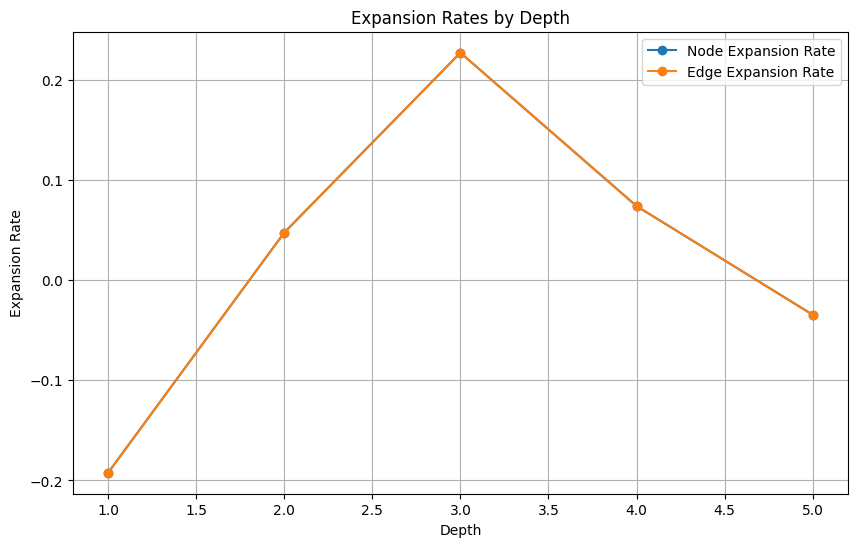

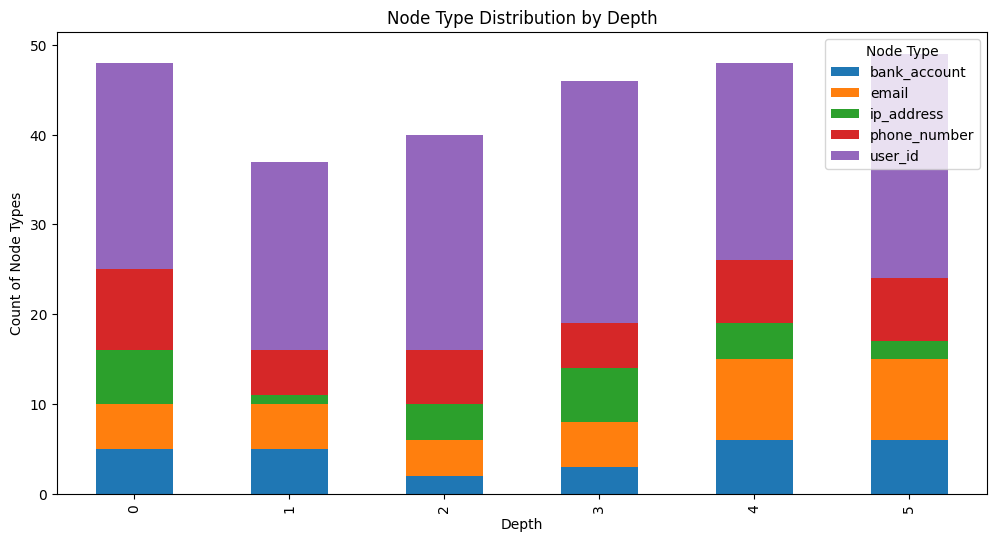

In [43]:
# Visualize
plot_expansion_speed(bfs_results)
plot_node_type_distribution(bfs_results)

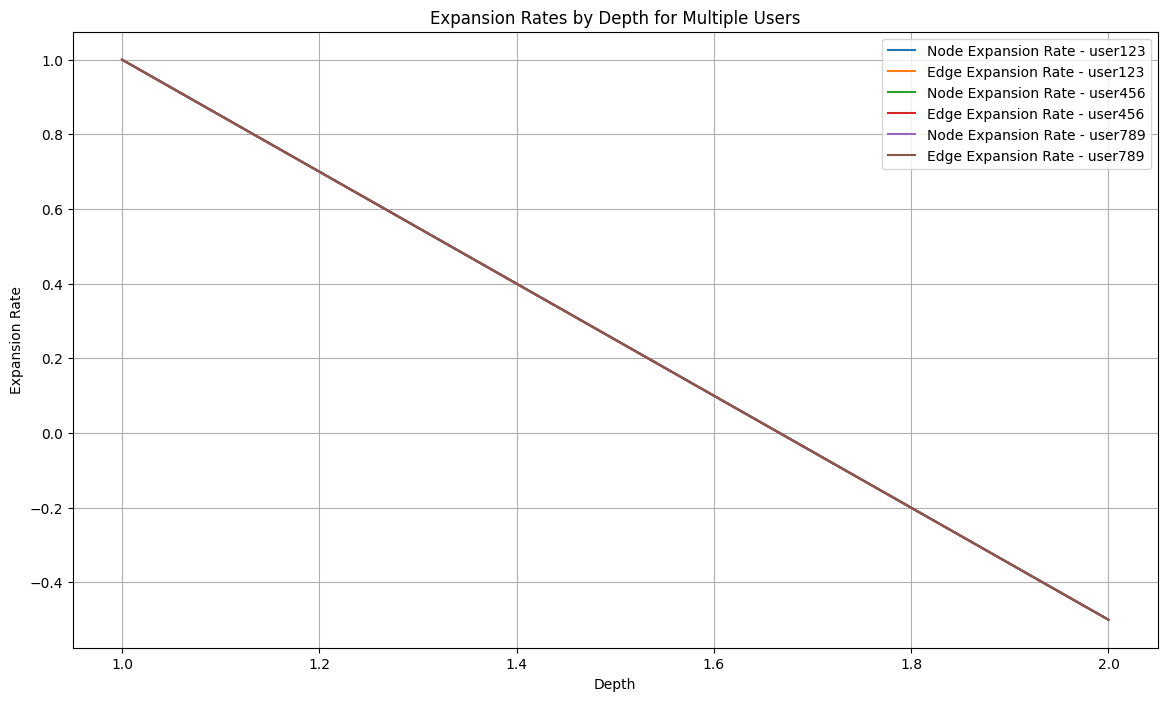

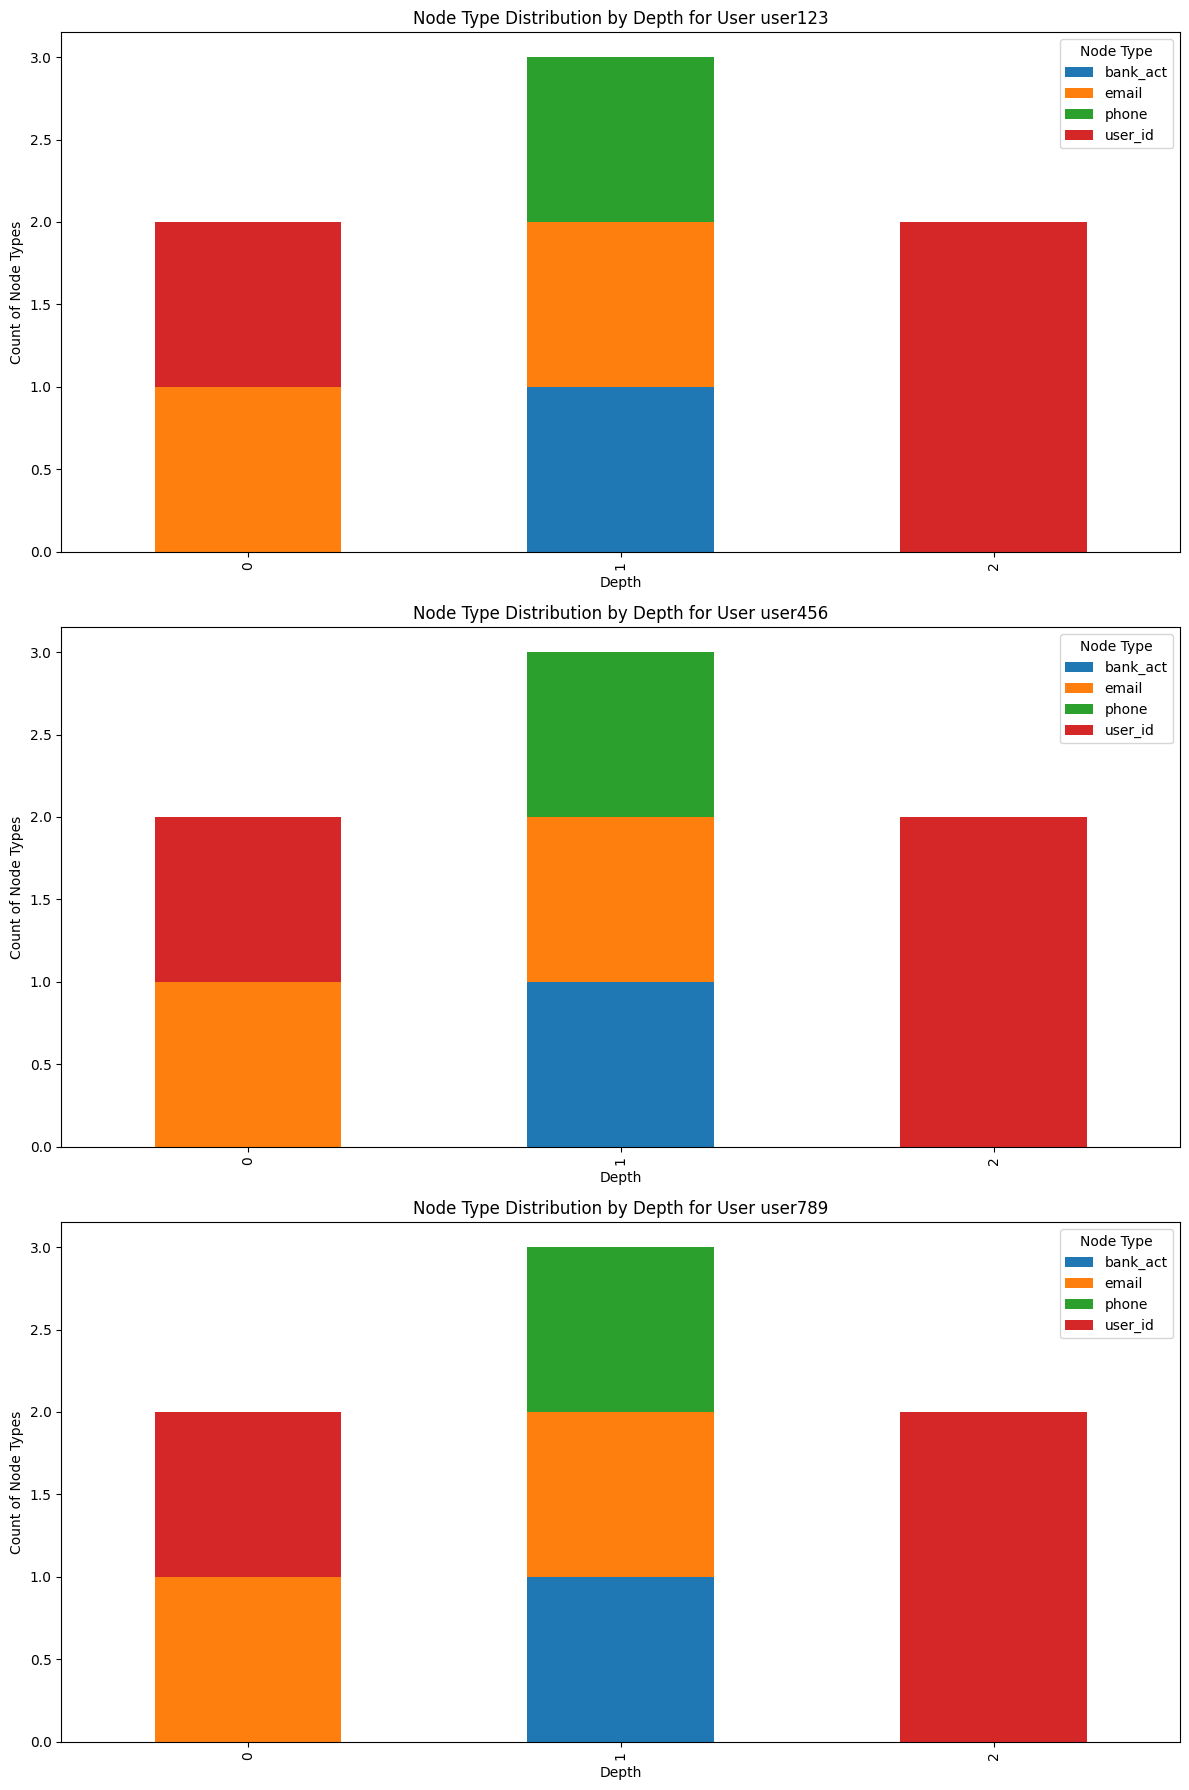

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from concurrent.futures import ThreadPoolExecutor

# Assuming BFS function is predefined and imported
# from bfs_module import BFS

def analyze_bfs_bulk(user_ids, max_depth):
    """
    Perform BFS for multiple user IDs and collect the results.
    
    :param user_ids: List of user IDs to analyze.
    :param max_depth: Maximum depth for BFS.
    :return: Dictionary of DataFrames keyed by user ID.
    """
    results = {}
    with ThreadPoolExecutor(max_workers=5) as executor:
        futures = {executor.submit(BFS, user_id, max_depth): user_id for user_id in user_ids}
        for future in futures:
            user_id = futures[future]
            try:
                result = future.result()
                results[user_id] = result
            except Exception as exc:
                print(f"User ID {user_id} generated an exception: {exc}")
    return results

def count_nodes_edges_bulk(bfs_results):
    """
    Count nodes and edges at each depth level for each user's BFS output.
    
    :param bfs_results: Dictionary of DataFrames from BFS function keyed by user ID.
    :return: Dictionary of DataFrames with depth, node_count, edge_count keyed by user ID.
    """
    counts = {}
    for user_id, data in bfs_results.items():
        edge_count_by_depth = data.groupby('depth').size().reset_index(name='edge_count')
        node_count_by_depth = pd.DataFrame({
            'node1': data['node1'],
            'node2': data['node2'],
            'depth': data['depth']
        }).drop_duplicates().groupby('depth').size().reset_index(name='node_count')
        counts[user_id] = pd.merge(edge_count_by_depth, node_count_by_depth, on='depth')
    return counts

def expansion_speed_bulk(bfs_results):
    """
    Calculate the expansion speed (node and edge growth) for each user as depth increases.
    
    :param bfs_results: Dictionary of DataFrames from BFS function keyed by user ID.
    :return: Dictionary of DataFrames with expansion rates keyed by user ID.
    """
    speeds = {}
    for user_id, data in bfs_results.items():
        counts = count_nodes_edges_bulk({user_id: data})[user_id]
        counts['node_expansion_rate'] = counts['node_count'].pct_change()
        counts['edge_expansion_rate'] = counts['edge_count'].pct_change()
        speeds[user_id] = counts
    return speeds

def node_type_distribution_bulk(bfs_results):
    """
    Calculate the distribution of node types at each depth for each user's BFS output.
    
    :param bfs_results: Dictionary of DataFrames from BFS function keyed by user ID.
    :return: Dictionary of DataFrames showing the count of each node type at each depth keyed by user ID.
    """
    distributions = {}
    for user_id, data in bfs_results.items():
        node_types = pd.concat([
            data[['node1', 'node1_type', 'depth']].rename(columns={'node1': 'node', 'node1_type': 'node_type'}),
            data[['node2', 'node2_type', 'depth']].rename(columns={'node2': 'node', 'node2_type': 'node_type'})
        ]).drop_duplicates()
        
        distributions[user_id] = node_types.pivot_table(index='depth', columns='node_type', aggfunc='size', fill_value=0)
    return distributions

def plot_bulk_expansion_speed(bfs_results):
    """
    Plot the bulk expansion rates for nodes and edges against depth for all user IDs.
    
    :param bfs_results: Dictionary of DataFrames from BFS function keyed by user ID.
    """
    expansion_rates = expansion_speed_bulk(bfs_results)
    plt.figure(figsize=(14, 8))
    for user_id, rates in expansion_rates.items():
        plt.plot(rates['depth'], rates['node_expansion_rate'], label=f'Node Expansion Rate - {user_id}')
        plt.plot(rates['depth'], rates['edge_expansion_rate'], label=f'Edge Expansion Rate - {user_id}')
    plt.xlabel('Depth')
    plt.ylabel('Expansion Rate')
    plt.title('Expansion Rates by Depth for Multiple Users')
    plt.legend()
    plt.grid(True)
    plt.show()

def plot_bulk_node_type_distribution(bfs_results):
    """
    Plot the bulk distribution of node types across depths for all user IDs.
    
    :param bfs_results: Dictionary of DataFrames from BFS function keyed by user ID.
    """
    distributions = node_type_distribution_bulk(bfs_results)
    fig, axes = plt.subplots(nrows=len(distributions), ncols=1, figsize=(12, 6 * len(distributions)))
    if len(distributions) == 1:
        axes = [axes]
    for ax, (user_id, dist) in zip(axes, distributions.items()):
        dist.plot(kind='bar', stacked=True, ax=ax)
        ax.set_title(f'Node Type Distribution by Depth for User {user_id}')
        ax.set_xlabel('Depth')
        ax.set_ylabel('Count of Node Types')
        ax.legend(title='Node Type')
    plt.tight_layout()
    plt.show()

# Example usage
user_ids = ['user_1', 'user456', 'user789']
max_depth = 5
bfs_results = analyze_bfs_bulk(user_ids, max_depth)

# Visualization
plot_bulk_expansion_speed(bfs_results)
plot_bulk_node_type_distribution(bfs_results)


In [53]:
import pandas as pd
import matplotlib.pyplot as plt
from functools import reduce

def count_nodes_edges_bulk(bfs_outputs):
    """
    Count nodes and edges at each depth level for multiple BFS outputs.

    :param bfs_outputs: List of DataFrames from BFS function for different user IDs.
    :return: DataFrame with user_id, depth, node_count, edge_count.
    """
    results = []
    for user_id, bfs_output in enumerate(bfs_outputs):
        counts = bfs_output.groupby('depth').size().reset_index(name='edge_count')
        nodes = pd.DataFrame({
            'node1': bfs_output['node1'],
            'node2': bfs_output['node2'],
            'depth': bfs_output['depth']
        }).drop_duplicates().groupby('depth').size().reset_index(name='node_count')
        counts = pd.merge(counts, nodes, on='depth')
        counts['user_id'] = user_id
        results.append(counts)
    return pd.concat(results, ignore_index=True)

def expansion_speed_bulk(bfs_outputs):
    """
    Calculate the expansion speed (node and edge growth) as depth increases for multiple BFS outputs.

    :param bfs_outputs: List of DataFrames from BFS function for different user IDs.
    :return: DataFrame with user_id, depth, node_expansion_rate, edge_expansion_rate.
    """
    all_counts = count_nodes_edges_bulk(bfs_outputs)
    all_counts['node_expansion_rate'] = all_counts.groupby('user_id')['node_count'].pct_change()
    all_counts['edge_expansion_rate'] = all_counts.groupby('user_id')['edge_count'].pct_change()
    return all_counts

def node_type_distribution_bulk(bfs_outputs):
    """
    Calculate the distribution of node types at each depth for multiple BFS outputs.

    :param bfs_outputs: List of DataFrames from BFS function for different user IDs.
    :return: DataFrame showing the count of each node type at each depth for all user IDs.
    """
    results = []
    for user_id, bfs_output in enumerate(bfs_outputs):
        node_types = pd.concat([
            bfs_output[['node1', 'node1_type', 'depth']].rename(columns={'node1': 'node', 'node1_type': 'node_type'}),
            bfs_output[['node2', 'node2_type', 'depth']].rename(columns={'node2': 'node', 'node2_type': 'node_type'})
        ]).drop_duplicates()
        
        dist = node_types.pivot_table(index='depth', columns='node_type', aggfunc='size', fill_value=0)
        dist = dist.reset_index()
        dist['user_id'] = user_id
        results.append(dist)

    final_dist = reduce(lambda left, right: pd.merge(left, right, on='depth', how='outer',
                                                     suffixes=('', '_dup')), results)
    final_dist = final_dist.loc[:, ~final_dist.columns.str.contains('_dup')]
    return final_dist

def plot_expansion_speed_bulk(bfs_outputs):
    """
    Plot the expansion rates for nodes and edges against depth for multiple BFS outputs.

    :param bfs_outputs: List of DataFrames from BFS function for different user IDs.
    """
    expansion_rates = expansion_speed_bulk(bfs_outputs)
    fig, ax = plt.subplots(figsize=(14, 7))
    for key, grp in expansion_rates.groupby(['user_id']):
        ax = grp.plot(ax=ax, kind='line', x='depth', y='node_expansion_rate', label=f'User {key} Node Rate')
        ax = grp.plot(ax=ax, kind='line', x='depth', y='edge_expansion_rate', label=f'User {key} Edge Rate')
    plt.legend(loc='best')
    plt.title('Node and Edge Expansion Rates by Depth for Multiple Users')
    plt.xlabel('Depth')
    plt.ylabel('Expansion Rate')
    plt.grid(True)
    plt.show()

def plot_node_type_distribution_bulk(bfs_outputs):
    """
    Plot the distribution of node types across depths for multiple BFS outputs.

    :param bfs_outputs: List of DataFrames from BFS function for different user IDs.
    """
    node_types = node_type_distribution_bulk(bfs_outputs)
    fig, ax = plt.subplots(figsize=(12, 8))
    for user_id in node_types['user_id'].unique():
        data = node_types[node_types['user_id'] == user_id].drop('user_id', axis=1).set_index('depth')
        data.plot(ax=ax, kind='bar', stacked=True, title=f'User {user_id} Node Type Distribution')
        plt.xlabel('Depth')
        plt.ylabel('Node Type Count')
        plt.legend(title='Node Type')
        plt.show()

# Example usage:
# Assume `bfs_results_list` is a list where each element is a DataFrame corresponding to the BFS output for a user_id.
# bfs_results_list = [BFS(user_id, max_depth) for user_id in user_ids]  # This line is just a placeholder

# plot_expansion_speed_bulk(bfs_results_list)
# plot_node_type_distribution_bulk(bfs_results_list)


5

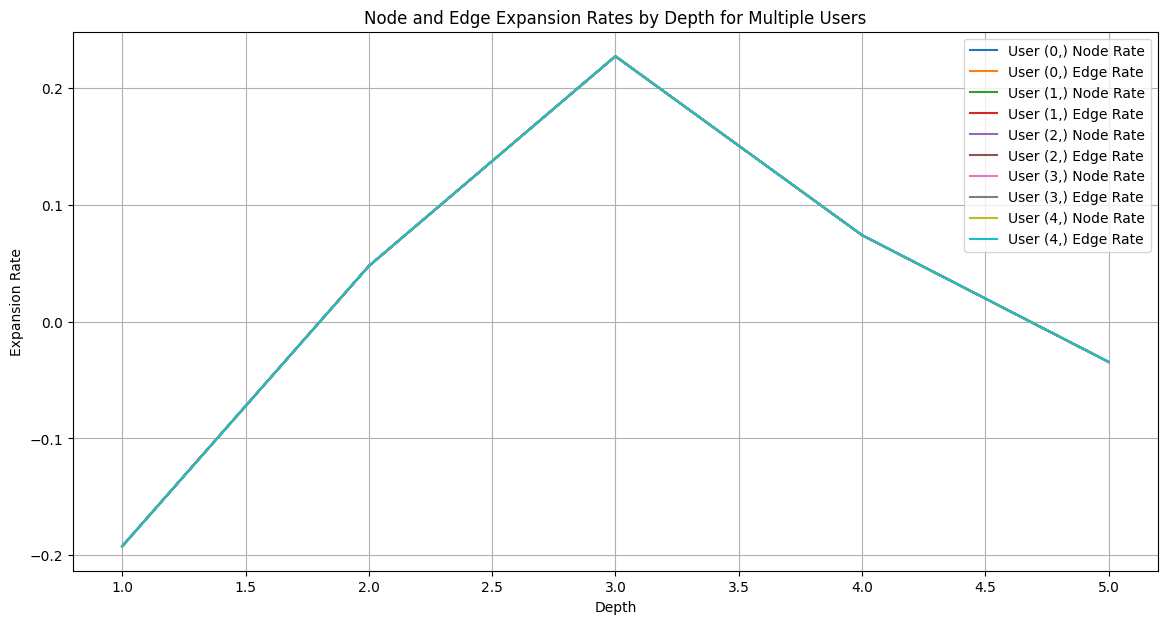

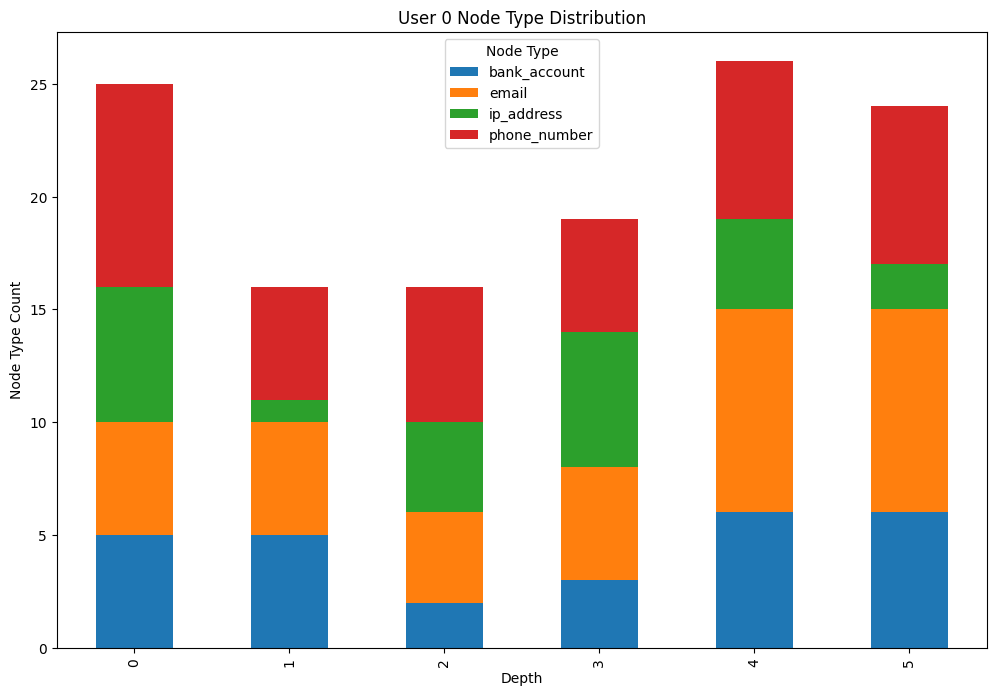

In [54]:

# Example usage:
# Assume `bfs_results_list` is a list where each element is a DataFrame corresponding to the BFS output for a user_id.
bfs_results_list = [df_synthetic] * 5

plot_expansion_speed_bulk(bfs_results_list)
plot_node_type_distribution_bulk(bfs_results_list)
